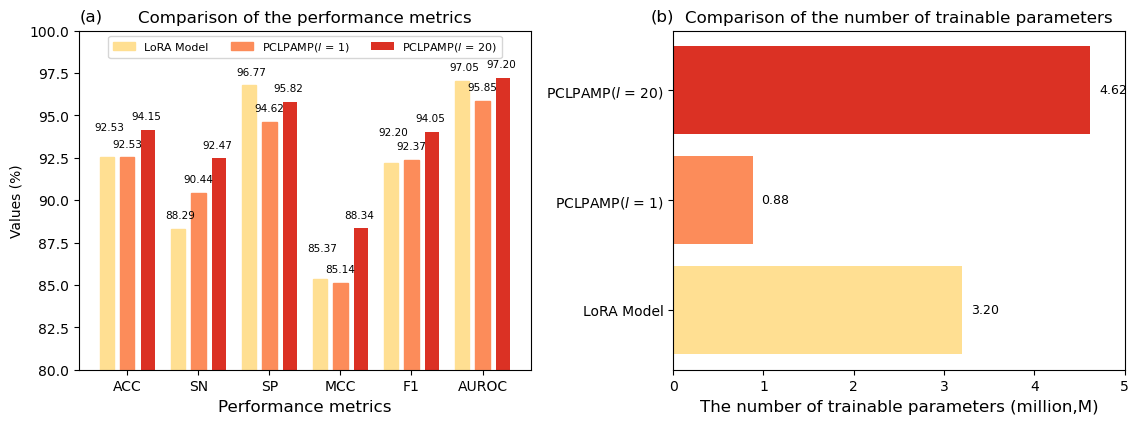

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# plt.rcParams['font.sans-serif'] = ['SimSun']
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['font.size'] = 10
# 定义数据
categories = ['ACC', 'SN', 'SP', 'MCC', 'F1', 'AUROC']
lora_model = [92.53, 88.29, 96.77, 85.37, 92.20, 97.05]
ptclpamp_1 = [92.53, 90.44, 94.62, 85.14, 92.37, 95.85]
ptclpamp_20 = [94.15, 92.47, 95.82, 88.34, 94.05, 97.20]

# 可训练参数数量
params = [3.20, 0.88, 4.62]
models = ['LoRA Model', 'PCLPAMP($l$ = 1)', 'PCLPAMP($l$ = 20)']

# 定义颜色，反过来
color1 = (219/255, 49/255, 36/255)
color2 = (252/255, 140/255, 90/255)
color3 = (255/255, 223/255, 146/255)
colors = [color3, color2, color1]

# 创建图形和子图
fig, ax = plt.subplots(1, 2, figsize=(11.5, 5.5))

# 定量指标条形图
x = np.arange(len(categories))
width = 0.2

patterns = ['/', '\\','']
hatches = [patterns[i % len(patterns)] for i in range(len(categories))]

ax[0].bar(x - width * 1.45, lora_model, width, label='LoRA Model', color=color3, hatch=hatches[0],edgecolor=color3)
ax[0].bar(x, ptclpamp_1, width, label='PCLPAMP($l$ = 1)', color=color2, hatch=hatches[1],edgecolor=color2)
ax[0].bar(x + width * 1.45, ptclpamp_20, width, label='PCLPAMP($l$ = 20)', color=color1, hatch=hatches[2])

# 在条形上方显示数值
for i in range(len(categories)):
    if i not in [0, 3, 4]:  # 排除索引为0和4的情况
        ax[0].text(i - width * 1.3, lora_model[i] + 0.5, f'{lora_model[i]:.2f}', ha='center', va='bottom', fontsize=7.5)
        ax[0].text(i, ptclpamp_1[i] + 0.5, f'{ptclpamp_1[i]:.2f}', ha='center', va='bottom', fontsize=7.5)
        ax[0].text(i + width * 1.3, ptclpamp_20[i] + 0.5, f'{ptclpamp_20[i]:.2f}', ha='center', va='bottom', fontsize=7.5)
    else:
        ax[0].text(i, ptclpamp_1[i] + 0.5, f'{ptclpamp_1[i]:.2f}', ha='center', va='bottom', fontsize=7.5)
        ax[0].text(i + width * 1.3, ptclpamp_20[i] + 0.5, f'{ptclpamp_20[i]:.2f}', ha='center', va='bottom', fontsize=7.5)

# 调整ACC和F1指标的数字位置
ax[0].text(0 - width * 1.3, lora_model[0] + 1.5, f'{lora_model[0]:.2f}', ha='center', va='bottom', fontsize=7.5)
ax[0].text(3 - width * 1.3, lora_model[3] + 1.5, f'{lora_model[3]:.2f}', ha='center', va='bottom', fontsize=7.5)
ax[0].text(4 - width * 1.3, lora_model[4] + 1.5, f'{lora_model[4]:.2f}', ha='center', va='bottom', fontsize=7.5)

ax[0].set_xlabel('Performance metrics', fontsize=12)
ax[0].set_ylabel('Values (%)', fontsize=10)
ax[0].set_title('Comparison of the performance metrics', fontsize=12)
ax[0].set_xticks(x)
ax[0].set_xticklabels(categories, fontsize=10)
ax[0].set_ylim(80, 100)  # 调整纵坐标范围
# ax[0].legend(fontsize=10)

# 在左上角添加标签(a)
ax[0].text(0, 1.063, '(a)', transform=ax[0].transAxes, fontsize=12, va='top')

# 可训练参数数量条形图
# bars = ax[1].barh(models, params, color=[color3, color2, color1])
bars = ax[1].barh(models, params, color=[color3, color2, color1])
ax[1].set_xlabel('The number of trainable parameters (million,M)', fontsize=12)
ax[1].set_title('Comparison of the number of trainable parameters', fontsize=12)
ax[1].set_xlim(0, 5)  # 增加x轴的范围以确保所有数值在边框内显示
# ax[1].set_yticklabels(models, fontsize=10)  # 设置y轴刻度字体大小

# 在左上角添加标签(b)
ax[1].text(-0.05, 1.063, '(b)', transform=ax[1].transAxes, fontsize=12, va='top')

# 在条形右侧显示数值
for bar, v in zip(bars, params):
    ax[1].text(v + 0.1, bar.get_y() + bar.get_height() / 2, f'{v:.2f}', va='center', color='black', fontsize=9)
ax[0].legend(loc='upper center', bbox_to_anchor=(0.5, 1), ncol=3, fontsize=8,handletextpad=0.8)
# 调整边框
plt.tight_layout(rect=[0, 0, 1, 0.8])  # 调整rect参数，确保内容在边框内显示
plt.savefig('../Figures/INDEP/color_english/Compared_LoRA_Gray_Hatch.svg', bbox_inches='tight', dpi=1200)
plt.show()